# **Trabajo Final del curso Aplicaciones de Data Science**

Sección: CC73

Elaborado por:

*   Andrea Fabiana García Napurí - u202014068
*   Claudia Letizia Sifuentes Mendieta - u20211a147


## Descarga del dataset: “Eye Diseases Classification”
disponible en el siguiente enlace: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification

In [ ]:
!gdown --id 1kLuS2MHwq24v7OBOl8FciJQFZcPTqLkg

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1kLuS2MHwq24v7OBOl8FciJQFZcPTqLkg
From (redirected): https://drive.google.com/uc?id=1kLuS2MHwq24v7OBOl8FciJQFZcPTqLkg&confirm=t&uuid=70dcdd4c-2721-4896-b0b8-cf2a868a9904
To: /content/archive.zip
100% 771M/771M [00:17<00:00, 43.1MB/s]


In [ ]:
import os
import zipfile

In [ ]:
# Ruta del archivo ZIP en Google Drive
zip_path = '/content/archive.zip'

# Ruta de destino para descomprimir el archivo ZIP
extract_path = '/content/'

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Análisis exploratorio de los datos (EDA)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Tareas de carga e inspección**

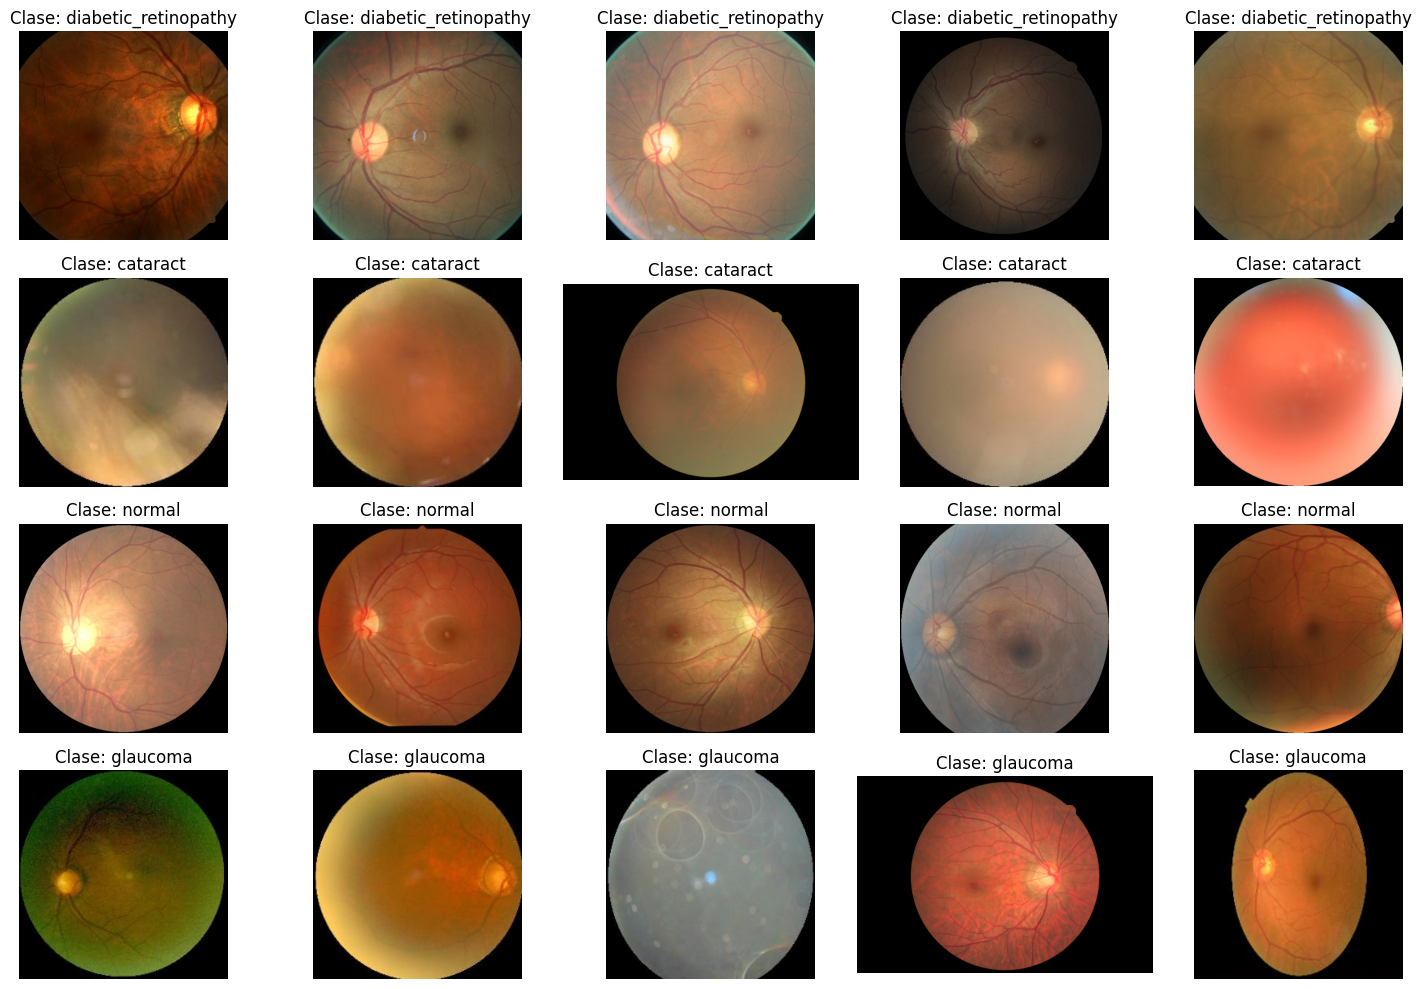

In [ ]:
# Para cargar las imágenes
def cargar_imagenes(data_dir):

    # Lista para almacenar las imágenes y sus etiquetas
    imagenes = []
    etiquetas = []

    # Iterar sobre cada clase
    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_dir, class_folder)
        # Listar las imágenes en la carpeta de la clase actual
        image_files = os.listdir(class_path)
        # Iterar sobre cada imagen en la carpeta de la clase actual
        for image_file in image_files:
            # Ruta de la imagen actual
            image_path = os.path.join(class_path, image_file)
            # Leer la imagen y agregarla a la lista de imágenes
            img = cv2.imread(image_path)
            imagenes.append(img)
            # Agregar la etiqueta de la clase a la lista de etiquetas
            etiquetas.append(class_folder)

    return imagenes, etiquetas

# Para inspeccionar las imágenes
def inspeccionar_imagenes(imagenes, etiquetas):
   # Definir el número máximo de imágenes por etiqueta a mostrar, en este caso 5
    max_imagenes_por_etiqueta = 5

    # Mostrar hasta max_imagenes_por_etiqueta de cada clase
    fig, axes = plt.subplots(len(set(etiquetas)), max_imagenes_por_etiqueta, figsize=(15, 10))
    for i, clase in enumerate(set(etiquetas)):
        clase_indices = [j for j, etiqueta in enumerate(etiquetas) if etiqueta == clase]
        # Iterar sobre las primeras max_imagenes_por_etiqueta imágenes de la clase actual
        for j, indice in enumerate(clase_indices[:max_imagenes_por_etiqueta]):
            img = imagenes[indice]
            axes[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[i, j].set_title(f'Clase: {clase}')
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Directorio que contiene las imágenes de todas las clases
data_dir = '/content/dataset'

# Listar las carpetas de clases
class_folders = os.listdir(data_dir)

# Cargar las imágenes y sus etiquetas
imagenes, etiquetas = cargar_imagenes(data_dir)

# Inspeccionar las imágenes
inspeccionar_imagenes(imagenes, etiquetas)

In [ ]:
# Distribución de clases (etiquetas)
class_distribution = {folder: len(os.listdir(os.path.join(data_dir, folder))) for folder in class_folders}
print("Distribución de clases:")
print(class_distribution)

Distribución de clases:
{'glaucoma': 1007, 'diabetic_retinopathy': 1098, 'normal': 1074, 'cataract': 1038}


In [ ]:
# Tamaño de las imágenes
image_sizes = []
for folder in class_folders:
    images = os.listdir(os.path.join(data_dir, folder))
    for image in images:
        img_path = os.path.join(data_dir, folder, image)
        img = cv2.imread(img_path)
        image_sizes.append(img.shape[:2])
image_sizes = np.array(image_sizes)
print("Tamaño mínimo de imagen:", np.min(image_sizes, axis=0))
print("Tamaño máximo de imagen:", np.max(image_sizes, axis=0))

Tamaño mínimo de imagen: [256 256]
Tamaño máximo de imagen: [1728 2592]


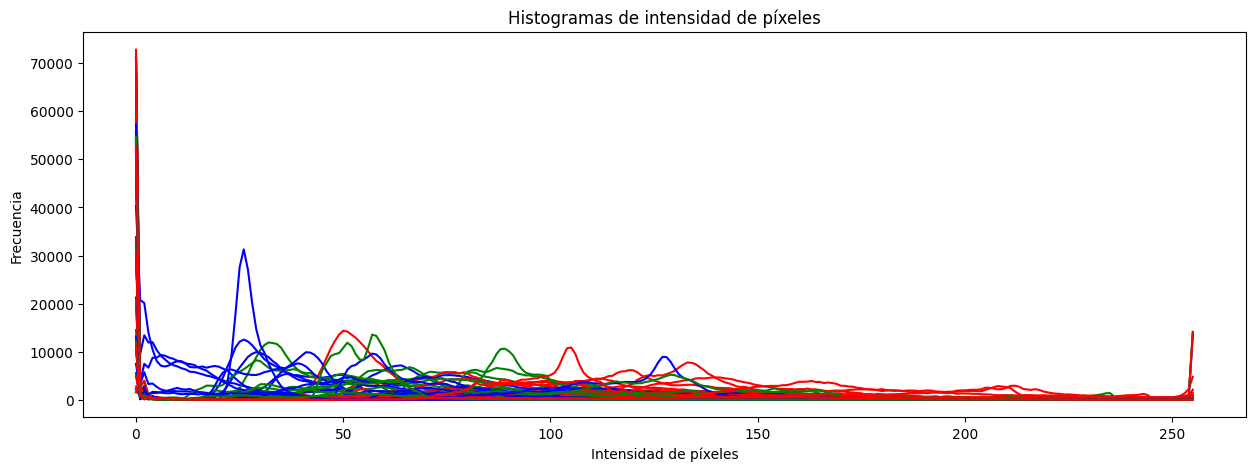

In [ ]:
# Histogramas de intensidad de píxeles
plt.figure(figsize=(15, 5))
for i, folder in enumerate(class_folders):
    images = os.listdir(os.path.join(data_dir, folder))
    for image in images[:5]:
        img_path = os.path.join(data_dir, folder, image)
        img = cv2.imread(img_path)
        for j, color in enumerate(['b', 'g', 'r']):
            hist = cv2.calcHist([img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
plt.title('Histogramas de intensidad de píxeles')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Reescalamiento de las imágenes

nuevo_tamano = (128, 128)  # 128x128 píxeles

# Iterar sobre cada clase
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    # Listar las imágenes en la carpeta de la clase actual
    image_files = os.listdir(class_path)
    # Iterar sobre cada imagen en la carpeta de la clase actual
    for image_file in image_files:
        # Ruta de la imagen actual
        image_path = os.path.join(class_path, image_file)
        # Leer la imagen
        img = cv2.imread(image_path)
        # Reescalar la imagen al nuevo tamaño
        img_reescalada = cv2.resize(img, nuevo_tamano)
        # Guardar la imagen reescalada
        cv2.imwrite(image_path, img_reescalada)


**Preprocesamiento y visualización de los datos**

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Función para preprocesar (normalizar) una imagen - iluminación
def preprocesar_imagen(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_intensity = gray_img.mean()
    std_intensity = gray_img.std()
    alpha = 128 / std_intensity
    beta = 128 - alpha * mean_intensity
    img_preprocesada = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return img_preprocesada

# Listas para almacenar las imágenes preprocesadas y sus etiquetas
imagenes_preprocesadas = []
etiquetas = []

# Directorio donde guardarás las imágenes preprocesadas
output_dir = '/content/datasetfinal'  # Reemplaza con la ruta donde guardarás las imágenes

os.makedirs(output_dir, exist_ok=True)

# Iterar sobre cada clase
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(data_dir, class_folder)
    output_class_path = os.path.join(output_dir, class_folder)

    # Crear la carpeta de salida si no existe
    os.makedirs(output_class_path, exist_ok=True)

    # Listar las imágenes en la carpeta de la clase actual
    image_files = os.listdir(class_path)

    # Iterar sobre cada imagen en la carpeta actual
    for image_file in image_files:
        # Ruta de la imagen original
        original_image_path = os.path.join(class_path, image_file)
        # Leer la imagen original
        original_img = cv2.imread(original_image_path)
        # Preprocesar la imagen original
        original_img_preprocessed = preprocesar_imagen(original_img)

        # Guardar la imagen preprocesada en el directorio de salida
        output_image_path = os.path.join(output_class_path, image_file)
        cv2.imwrite(output_image_path, original_img_preprocessed)

        # Agregar la etiqueta de la clase a la lista de etiquetas
        etiquetas.append(class_folder)

        # Agregar la imagen preprocesada a la lista (opcional, dependiendo de tus necesidades)
        imagenes_preprocesadas.append(original_img_preprocessed)

plt.tight_layout()
plt.show()

print("Imágenes preprocesadas y guardadas en:", output_dir)

<Figure size 640x480 with 0 Axes>

Imágenes preprocesadas y guardadas en: /content/datasetfinal


In [ ]:
import shutil
import os

# Ruta de la carpeta que deseas comprimir
folder_to_zip = '/content/datasetfinal'  # Reemplaza con tu ruta

# Ruta donde se guardará el archivo comprimido
zip_file = '/content/datasetfinal'  # Puedes cambiar la ruta y el nombre del archivo

# Comprimir la carpeta
shutil.make_archive(zip_file, 'zip', folder_to_zip)

'/content/datasetfinal.zip'

Para dividir en Entrenamiento y Validación

In [ ]:
import os
import shutil
import random

# Directorio donde se encuentran las subcarpetas de clases
dataset_dir = '/content/dataset'

# Directorios de entrenamiento y validación
train_dir = '/content/train/'
val_dir = '/content/validation/'

# Crear directorios de entrenamiento y validación si no existen
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Lista de clases
classes = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Ratio de datos de validación
val_split = 0.2

# Iterar sobre las clases y copiar las imágenes
for cls in classes:
    cls_dir = os.path.join(dataset_dir, cls)
    files = os.listdir(cls_dir)
    random.shuffle(files)
    num_val = int(len(files) * val_split)

    # Copiar archivos de entrenamiento
    train_cls_dir = os.path.join(train_dir, cls)
    os.makedirs(train_cls_dir, exist_ok=True)
    for f in files[num_val:]:
        shutil.copy(os.path.join(cls_dir, f), os.path.join(train_cls_dir, f))

    # Copiar archivos de validación
    val_cls_dir = os.path.join(val_dir, cls)
    os.makedirs(val_cls_dir, exist_ok=True)
    for f in files[:num_val]:
        shutil.copy(os.path.join(cls_dir, f), os.path.join(val_cls_dir, f))

# CON TRANSFER LEARNING:
red neuronal preentrenada: modelo VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os

physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [ ]:
# Ruta de la carpeta que contiene las subcarpetas de las clases
dataset_dir = '/content/dataset'

# Parámetros de entrada
img_height, img_width = 224, 224  # Tamaño de entrada para VGG16
batch_size = 32
num_classes = 4  # Número de clases (cataract, diabetic_retinopathy, glaucoma, normal)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Separar el 20% de los datos para validación
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [ ]:
# Cargar el modelo VGG16 preentrenado sin la capa superior
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir nuevas capas de clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Definir el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir el callback de EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=2,          # Número de épocas sin mejora después de las cuales se detiene el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)

# Número de épocas
epochs = 5

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping]  # Agregar el callback aquí
)

Epoch 1/5
105/105 [==============================] - 2649s 25s/step - loss: 0.8768 - accuracy: 0.6367 - val_loss: 0.7543 - val_accuracy: 0.7019
Epoch 2/5
105/105 [==============================] - 2599s 25s/step - loss: 0.5500 - accuracy: 0.7907 - val_loss: 0.6480 - val_accuracy: 0.7464
Epoch 3/5
105/105 [==============================] - 2615s 25s/step - loss: 0.4587 - accuracy: 0.8263 - val_loss: 0.6366 - val_accuracy: 0.7296
Epoch 4/5
105/105 [==============================] - 2612s 25s/step - loss: 0.3938 - accuracy: 0.8538 - val_loss: 0.8598 - val_accuracy: 0.5913
Epoch 5/5
105/105 [==============================] - 2616s 25s/step - loss: 0.3952 - accuracy: 0.8475 - val_loss: 0.6520 - val_accuracy: 0.7368


In [ ]:
model.save('eye_disease_classifier_tl.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predicciones en el conjunto de validación
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Etiquetas verdaderas
y_true = validation_generator.classes

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print('Matriz de Confusión')
print(cm)

# Informe de clasificación
target_names = list(validation_generator.class_indices.keys())
print('Informe de Clasificación')
print(classification_report(y_true, y_pred, target_names=target_names))

27/27 [==============================] - 19s 670ms/step
Matriz de Confusión
[[183   0  24   0]
 [181   0  38   0]
 [158   0  43   0]
 [176   0  38   0]]
Informe de Clasificación
                      precision    recall  f1-score   support

            cataract       0.26      0.88      0.40       207
diabetic_retinopathy       0.00      0.00      0.00       219
            glaucoma       0.30      0.21      0.25       201
              normal       0.00      0.00      0.00       214

            accuracy                           0.27       841
           macro avg       0.14      0.27      0.16       841
        weighted avg       0.14      0.27      0.16       841



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Para probar:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo .h5
model = load_model('eye_disease_classifier_tl.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_height, img_width =  150, 150  # Dimensiones esperadas por el modelo VGG16

# Cargar una imagen de prueba (reemplaza 'path_to_your_image.jpg' con la ruta de tu imagen)
img_path = '/content/dataset/glaucoma/1020_left.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Define las etiquetas de las clases
class_labels = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Hacer la predicción
predictions = model.predict(x)

# Obtener la clase con mayor probabilidad
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]

print("Clase predicha:", predicted_class_label)

1/1 [==============================] - 0s 109ms/step
Clase predicha: glaucoma


# CON CNN:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Configuraciones generales
img_width, img_height = 150, 150
batch_size = 32
epochs = 100

# Directorios
train_data_dir = 'dataset'  # La carpeta que contiene las subcarpetas cataract, diabetic_retinopathy, glaucoma, normal

# Preparación de los datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 80% training and 20% validation

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Definición del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 clases: cataract, diabetic_retinopathy, glaucoma, normal
])

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [ ]:
# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Evaluación del modelo
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Guardar el modelo
model.save('eye_disease_classifier_cnn.h5')

Epoch 1/100
105/105 [==============================] - 250s 2s/step - loss: 1.2148 - accuracy: 0.4318 - val_loss: 1.1562 - val_accuracy: 0.4784
Epoch 2/100
105/105 [==============================] - 246s 2s/step - loss: 1.0616 - accuracy: 0.5368 - val_loss: 1.1017 - val_accuracy: 0.5204
Epoch 3/100
105/105 [==============================] - 242s 2s/step - loss: 0.9609 - accuracy: 0.5909 - val_loss: 1.0673 - val_accuracy: 0.5373
Epoch 4/100
105/105 [==============================] - 242s 2s/step - loss: 0.9045 - accuracy: 0.6199 - val_loss: 1.0129 - val_accuracy: 0.5505
Epoch 5/100
105/105 [==============================] - 261s 2s/step - loss: 0.8454 - accuracy: 0.6534 - val_loss: 1.0035 - val_accuracy: 0.5565
Epoch 6/100
105/105 [==============================] - 259s 2s/step - loss: 0.8487 - accuracy: 0.6621 - val_loss: 0.9715 - val_accuracy: 0.5745
Epoch 7/100
105/105 [==============================] - 245s 2s/step - loss: 0.7693 - accuracy: 0.6929 - val_loss: 0.9497 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualización del rendimiento del modelo

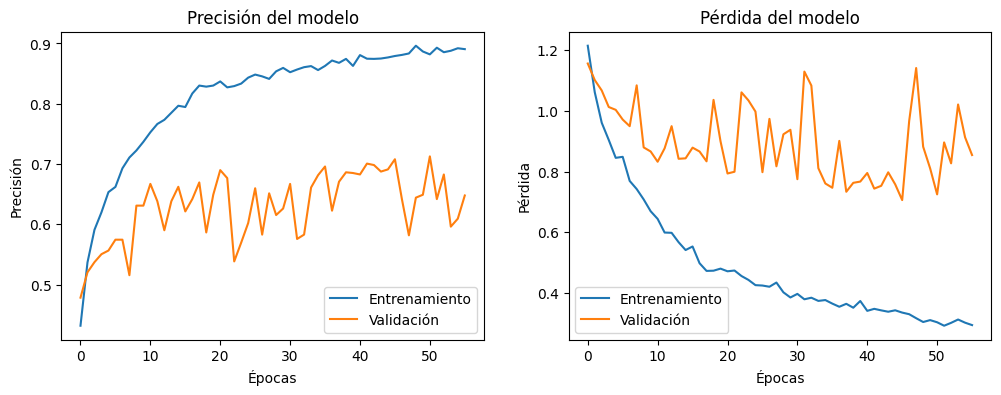

In [ ]:
import matplotlib.pyplot as plt

# Visualizar el rendimiento del modelo
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

**Matriz de confusión**:  permite ver en detalle cómo se están clasificando las diferentes clases

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predicciones en el conjunto de validación
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Etiquetas verdaderas
y_true = validation_generator.classes

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print('Matriz de Confusión')
print(cm)

# Informe de clasificación
target_names = list(validation_generator.class_indices.keys())
print('Informe de Clasificación')
print(classification_report(y_true, y_pred, target_names=target_names))


27/27 [==============================] - 32s 1s/step
Matriz de Confusión
[[ 37  53  14 103]
 [ 40  47  17 115]
 [ 45  46  25  85]
 [ 41  58  19  96]]
Informe de Clasificación
                      precision    recall  f1-score   support

            cataract       0.23      0.18      0.20       207
diabetic_retinopathy       0.23      0.21      0.22       219
            glaucoma       0.33      0.12      0.18       201
              normal       0.24      0.45      0.31       214

            accuracy                           0.24       841
           macro avg       0.26      0.24      0.23       841
        weighted avg       0.26      0.24      0.23       841



Para ponerlo en prueba

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo
model = load_model('eye_disease_classifier_cnn.h5')

img_path = '/content/dataset/diabetic_retinopathy/10003_right.jpeg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Define las etiquetas de las clases
class_labels = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Hacer la predicción
predictions = model.predict(x)

# Obtener la clase con mayor probabilidad
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]

print("Clase predicha:", predicted_class_label)

1/1 [==============================] - 0s 172ms/step
Clase predicha: diabetic_retinopathy


# COMPARACIÓN

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Cargar los modelos
tl_model_path = '/content/eye_disease_classifier_tl.h5'
cnn_model_path = '/content/eye_disease_classifier_cnn.h5'

tl_model = load_model(tl_model_path)
cnn_model = load_model(cnn_model_path)

# Compilar los modelos
tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar el generador de datos de validación
img_height, img_width = 150, 150  # Ajusta según el tamaño de tus imágenes
batch_size = 32

validation_data_dir = '/content/validation'

validation_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Evaluar los modelos en el conjunto de validación
tl_model_eval = tl_model.evaluate(validation_generator)
cnn_model_eval = cnn_model.evaluate(validation_generator)

print(f'\n\nResultados del modelo de transfer learning:')
print(f'Loss: {tl_model_eval[0]}, Accuracy: {tl_model_eval[1]}')

print(f'\nResultados del modelo de CNN personalizado:')
print(f'Loss: {cnn_model_eval[0]}, Accuracy: {cnn_model_eval[1]}')


Found 841 images belonging to 4 classes.
27/27 [==============================] - 16s 577ms/step - loss: 0.6272 - accuracy: 0.8145


Resultados del modelo de transfer learning:
Loss: 1.3980560302734375, Accuracy: 0.2639714479446411

Resultados del modelo de CNN personalizado:
Loss: 0.6271692514419556, Accuracy: 0.8145065307617188


- El modelo de transfer learning tiene una baja precisión y alta pérdida, lo que indica que se necesita ajustes adicionales o más datos para mejorar su rendimiento.

- El modelo de CNN personalizado muestra una precisión mucho más alta y una pérdida menor, lo cual es positivo y sugiere que este modelo podría estar mejor adaptado a los datos específicos o haber sido entrenado más eficazmente.